<img SRC="Imagen.jpg"/>
<center><h1 Style="color:#4682B4">Analisis de Datos</h1></center>
<center><h5>Universidad Castro Carazo</h5></center>
<center><h6>2C - 2022</h6></center>
</br>
</br>
<p Style="text-aling: justify" >Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular. 

Como se puede incrementar las ventas de autos de segunda mano? 

Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones.</p>
</br>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de datos para el analisis</a>

<h2 Style="color:#1E90FF">1. Carga y estandarizacion de los set de datos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Importar las librerias de necesarias</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los ecabezados de los DataFrames</li>
    <li>Si solo Si temenos mas de 1 set de datos - Unir los set de datos en un unico Dataframe</li>
</ol>

<h3 Style="color:#1E90FF">1.1 Importar las librerias</h3>

In [1]:
import pandas as pd             #se va usar para el manejo de dataFrame.
import numpy as np              #se va usar para el manejo de estructuras de datos.
import matplotlib.pyplot as ptl #para el manejo de graficos.

<h3 Style="color:#1E90FF">1.2 Importar el set de datos</h3>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors", 
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos = pd.read_csv("autos.csv", names=cols)
df_2do_autos = pd.read_csv("Autos 1.csv", names=cols)

In [3]:
df_1er_autos.shape #Esto me permite conocer el tamanho del DataFrame

(197, 26)

In [4]:
df_2do_autos.shape

(29, 26)

In [5]:
df_1er_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
df_1er_autos.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 Style="color:#1E90FF">1.3 Revisar encabezados de los set de datos</h3>

In [8]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [9]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h3 Style="color:#1E90FF">1.4 Unir Archivos en un solo DataFrame</h3>

In [11]:
unionArchivos = [df_1er_autos, df_2do_autos] #lista de dataframes, con esto hacemos la unificacion de 1 o mas trablas o set de datos
dfautos = pd.concat(unionArchivos)
dfautos.shape

(226, 26)

In [12]:
dfautos.head(3)#llamo las primeras 3 lineas

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [13]:
dftem = dfautos.iloc[:,0:2]# llamo las primeras 3 filas y las dos primeras columnas, los numeros determinan la cantidad

In [14]:
dftem

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
...,...,...
24,0,?
25,0,?
26,-2,103
27,-1,74


In [15]:
dftemp = dfautos.iloc[[0,3,6,24],[0,5,6]]

In [16]:
dftemp

,symboling,doors,style
0,3,two,convertible
3,2,four,sedan
6,1,four,sedan
24,1,four,hatchback


In [17]:
df_autos = dfautos

In [18]:
df_autos.shape

(226, 26)

<h2 Style="color:#1E90FF">2. Manejo de Valores Faltantes Nulos o Perdidos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Identificar como se muestran los valores faltanres (BD,Excel, txt, etc) se reflejan (null, espacio vacio,?) y estandarizarlos (NaN)</li>
    <li>Contar los valores NaN faltantes por variable (columna)</li>
    <li>Analisis de imputaciòn (el promedio, con esto se evita la desviacion estandar) para el caso de los numericos</li>
    <li>Analisis de imputaciòn (con el valor mas frecuente / Machune Leardin) para los casos de caracter</li>
    <li>Eliminar filas o columnas con valores faltantes</li>
</ol>

<h3 Style="color:#2F4F4F">2.1 Importar las librerias</h3>

In [19]:
df_autos.head(15)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [20]:
df_autos.replace("?", np.nan, inplace = True)# es para remplazar valores vacios en la tabla y con el true lo salva
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h3 Style="color:#1E90FF"> 2.2 Consultar valores faltantes por columna</h3>

In [21]:
valoresPedidos = df_autos.isnull()

In [22]:
valoresPedidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in valoresPedidos.columns.values.tolist():#para identificar valores falsos
    print (column)
    print (valoresPedidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h3 Style="color:#1E90FF"> 2.3 Imputar Datos Numericos</h3>
<img SRC="img03.png"/>

In [24]:
avg_normalized = df_autos["normalized"].astype("float").mean(axis=0)#esto es paa
print ('la media del normalized: ', avg_normalized)


la media del normalized:  122.28333333333333


In [25]:
df_autos["normalized"].replace(np.nan, 122, inplace=True)
df_autos.head

<bound method NDFrame.head of     symboling normalized         make    fuel aspiration doors        style  \
0           3        122  alfa-romero     gas        std   two  convertible   
1           3        122  alfa-romero     gas        std   two  convertible   
2           1        122  alfa-romero     gas        std   two    hatchback   
3           2        164         audi     gas        std  four        sedan   
4           2        164         audi     gas        std  four        sedan   
..        ...        ...          ...     ...        ...   ...          ...   
24          0        122   volkswagen  diesel      turbo  four        sedan   
25          0        122   volkswagen     gas        std  four        wagon   
26         -2        103        volvo     gas        std  four        sedan   
27         -1         74        volvo     gas        std  four        wagon   
28         -2        103        volvo     gas        std  four        sedan   

   wheels engine   ba

<h3 Style="color:#1E90FF"> 2.4 Imputar Datos Caracter</h3>
<img SRC="img03.png"/>

In [26]:
df_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
df_autos["doors"].value_counts()

four    124
two     100
Name: doors, dtype: int64

In [28]:
df_autos["doors"].value_counts().idxmax()

'four'

In [29]:
df_autos["doors"].replace(np.nan, 'four', inplace=True)


In [30]:
valoresPedidos = df_autos.isnull()
for column in valoresPedidos.columns.values.tolist():#para identificar valores falsos
    print (column)
    print (valoresPedidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       4
Name: stroke, dtype: i

<h3 Style="color:#1E90FF"> 2.5 Eliminar filas con valores faltantes</h3>

In [31]:
df_autos.dropna(subset = ('price'), axis = 0, inplace=True)# elimina campos vacios
df_autos.reset_index(drop=True, inplace=True)# actualiza el index

In [32]:
df_autos.dropna(subset = ('bore'), axis = 0, inplace=True)# elimina campos vacios
df_autos.reset_index(drop=True, inplace=True)# actualiza el index

In [33]:
df_autos.dropna(subset = ('stroke'), axis = 0, inplace=True)# elimina campos vacios
df_autos.reset_index(drop=True, inplace=True)# actualiza el index

In [34]:
df_autos.dropna(subset = ('horsepower'), axis = 0, inplace=True)# elimina campos vacios
df_autos.reset_index(drop=True, inplace=True)# actualiza el index

In [35]:
df_autos.dropna(subset = ('peak'), axis = 0, inplace=True)# elimina campos vacios
df_autos.reset_index(drop=True, inplace=True)# actualiza el index

In [36]:
df_autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
212,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
213,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
214,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [37]:
valoresPedidos = df_autos.isnull()
for column in valoresPedidos.columns.values.tolist():#para identificar valores falsos
    print (column)
    print (valoresPedidos[column].value_counts())
    print ("")

symboling
False    216
Name: symboling, dtype: int64

normalized
False    216
Name: normalized, dtype: int64

make
False    216
Name: make, dtype: int64

fuel
False    216
Name: fuel, dtype: int64

aspiration
False    216
Name: aspiration, dtype: int64

doors
False    216
Name: doors, dtype: int64

style
False    216
Name: style, dtype: int64

wheels
False    216
Name: wheels, dtype: int64

engine
False    216
Name: engine, dtype: int64

base
False    216
Name: base, dtype: int64

length
False    216
Name: length, dtype: int64

width
False    216
Name: width, dtype: int64

heingt
False    216
Name: heingt, dtype: int64

curb
False    216
Name: curb, dtype: int64

engineType
False    216
Name: engineType, dtype: int64

Cylinders
False    216
Name: Cylinders, dtype: int64

engine-size
False    216
Name: engine-size, dtype: int64

system
False    216
Name: system, dtype: int64

bore
False    216
Name: bore, dtype: int64

stroke
False    216
Name: stroke, dtype: int64

compression
False   

<h2 Style="color:#FF7F50">3. Estandarizacion de datos</h2>
<p>
<p>Que se hace en esta etapa?</p>

<ol>
    <li>Verificar el dominio de las variables y se ajusta, si es necesario</li>
    <li>Convertir valosres en funcion de la interpretacion</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1 </li>
    <li>Agrupar Datos (Binning)</li>
</ol>

<h3 Style="color:#2F4F4F">3.1 Verificar el dominio de las variables</h3>

In [38]:
df_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
df_autos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [40]:
df_autos[["normalized","peak"]] = df_autos[["normalized","peak"]].astype("int")
df_autos[["bore","stroke", "price"]] = df_autos[["bore","stroke", "price"]].astype("float")

In [41]:
df_autos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak             int32
City             int64
Higway           int64
price          float64
dtype: object

In [42]:
import matplotlib.pyplot as plt
import numpy as np


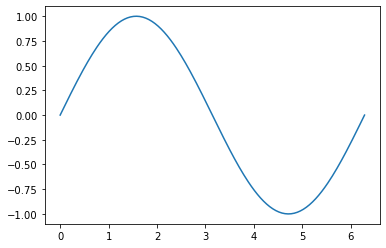

In [43]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()